In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json

In [2]:
from bs4 import BeautifulSoup

In [3]:
df = pd.read_csv('perfs.csv')
df['songid'].unique()

array(['_hey_there_delilah', '_closing_time', '_burn',
       '_as_long_as_you_love_me', '_all_star', '_toxic', '_want_u_back',
       '_happy', '_all_the_small_things', '_super_bass', '_hallelujah',
       '_valerie', '_hush_little_baby', '_more_than_this', '_let_it_go',
       '_wanted', '_bubbly', '_pompeii', '_just_the_way_you_are_bm',
       '_young_girls', '_demons', '_ill_be', '_let_her_go',
       '_cups_pitch_perfect', '_say_something_great_big', '_kiss_me_',
       '_home_phillip_phillips', '_if_i_aint_got_you',
       '_total_eclipse_of_heart', '_the_rose', '_wind_beneath_my_wings',
       '_crazy_patsy', '_achy_breaky_heart', '_girls_just_want_have_fun',
       '_on_my_own', '_songbird', '_from_this_moment',
       '_always_on_my_mind', '_all_the_man_i_need', '_need_you_now',
       '_safe_and_sound_capital', '_fuckin_perfect', '_because_of_you',
       '_i_wont_give_up', '_clarity', '_alone_heart', '_love_song',
       '_i_dreamed_a_dream', '_part_of_your_world', '_human',

In [17]:
base_url = 'https://search.yahoo.com/search?p='
url = base_url + ''+'let+'+'it+'+'go+'+'song+youtube'
response = requests.get(url)

In [18]:
soup = BeautifulSoup(response.text)

<!DOCTYPE html>
<html class="NoJs" id="Stencil" lang="en-US">
 <head>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <link href="https://s.yimg.com/pv/static/img/yahoo_purple_icon_ipad_76.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="https://s.yimg.com/pv/static/img/yahoo_purple_icon_ipad_152.png" rel="apple-touch-icon" sizes="144x144"/>
  <meta content="origin" name="referrer"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <noscript>
   <meta content="0;url=https://search.yahoo.com/search?p=let+it+go+song&amp;ei=UTF-8&amp;nojs=1" http-equiv="refresh"/>
  </noscript>
  <script type="text/javascript">
   (function(){var g=window,p=document,r,l;var o=false;var m=2,j="\x03",i="\x04",k="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789._-";function n(x){if(!x){return null}x._r=m;var y=[],u=0,t;for(t in x){var d=x[t];if(typeof d!=="string"){d=String(d)
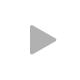

In [19]:
print(soup.prettify())

In [24]:
results = soup.find_all('a', class_="ac-algo fz-l ac-21th lh-24")
results[0].text

'Disney\'s Frozen "Let It Go" Sequence Performed by Idina ...'

In [27]:
df=pd.read_csv('perfs.csv')
df.head()

,plyrid,perf_key,songid,gender,birthyear,lovetot,zone
0,360,360_35435057,_hey_there_delilah,M,1988.0,3.0,EN
1,360,360_26934219,_closing_time,M,1988.0,2.0,EN
2,360,360_35435961,_burn,M,1988.0,2.0,EN
3,360,360_36313263,_burn,M,1988.0,2.0,EN
4,360,360_35352936,_as_long_as_you_love_me,M,1988.0,2.0,EN


In [29]:
songlist = list(df['songid'].unique())

In [39]:
songlink = []
for song in songlist:
    try:
        inner_arr =[]
        url = 'https://search.yahoo.com/search?p='
        song_arr = song.split('_')
        song_arr1 = song_arr.pop(0)
        print(song_arr1)
        for s_ele in song_arr1:
            s_ele=s_ele.capitalize()
            url = url+s_ele+'+'
        url = url +'song+youtube'
        response = requests.get(url)
        results = soup.find_all('a', class_="ac-algo fz-l ac-21th lh-24")
        text = results[0].text
        link = results[0]['href']
        inner_arr.append(song)
        inner_arr.append(song_arr1)
        inner_arr.append(text)
        inner_arr.append(link)
        songlink.append(inner_arr)
    except:
        print('error'+song)

In [54]:
songlink = []
for song in songlist:
    try:
        inner_arr =[]
        url = 'https://search.yahoo.com/search?p='
        song_arr = song.split('_')
        song_arr.pop(0)
        print(song_arr)
        song_arr1 = ''
        for s_ele in song_arr:
            song_arr1 = song_arr1 + s_ele.capitalize()+ ' '
            url = url+s_ele+'+'
    
        url = url +'song+youtube'
        print(url)
        response = requests.get(url)
        soup = BeautifulSoup(response.text)
        results = soup.find_all('a', class_="ac-algo fz-l ac-21th lh-24")
        text = results[0].text
        link = results[0]['href']

        inner_arr.append(song)
        print(song_arr1)
        inner_arr.append(song_arr1)
        inner_arr.append(text)
        print(link)
        inner_arr.append(link)
        songlink.append(inner_arr)
    except:
        print('error'+song)

['hey', 'there', 'delilah']
https://search.yahoo.com/search?p=hey+there+delilah+song+youtube
Hey There Delilah 
https://www.youtube.com/watch?v=hQlPzrX8u0A
['closing', 'time']
https://search.yahoo.com/search?p=closing+time+song+youtube
Closing Time 
https://www.youtube.com/watch?v=7-0lV5qs1Qw
['burn']
https://search.yahoo.com/search?p=burn+song+youtube
Burn 
https://www.youtube.com/watch?v=gCT3Li5dfZE
['as', 'long', 'as', 'you', 'love', 'me']
https://search.yahoo.com/search?p=as+long+as+you+love+me+song+youtube
As Long As You Love Me 
https://www.youtube.com/watch?v=v-FVihIlU2g
['all', 'star']
https://search.yahoo.com/search?p=all+star+song+youtube
All Star 
https://www.youtube.com/watch?v=5ZYgIrqELFw
['toxic']
https://search.yahoo.com/search?p=toxic+song+youtube
Toxic 
https://www.youtube.com/watch?v=Z6dcgD6-ZXM
['want', 'u', 'back']
https://search.yahoo.com/search?p=want+u+back+song+youtube
Want U Back 
https://www.youtube.com/watch?v=inwAc-ZBpx0
['happy']
https://search.yahoo.com/se

When I Was Your Man 
https://www.youtube.com/watch?v=8WgP_NzXdd8
['this', 'little', 'lght', 'of', 'mine']
https://search.yahoo.com/search?p=this+little+lght+of+mine+song+youtube
This Little Lght Of Mine 
https://www.youtube.com/watch?v=QCN893hzueQ
['boyfriend']
https://search.yahoo.com/search?p=boyfriend+song+youtube
Boyfriend 
https://www.youtube.com/watch?v=zd5GGvWWnzU
['baby', 'bieber']
https://search.yahoo.com/search?p=baby+bieber+song+youtube
Baby Bieber 
https://www.youtube.com/watch?v=KSnda5-o654
['apologize']
https://search.yahoo.com/search?p=apologize+song+youtube
Apologize 
https://www.youtube.com/watch?v=qm-QoJcra8U
['the', 'lazy', 'song']
https://search.yahoo.com/search?p=the+lazy+song+song+youtube
The Lazy Song 
https://www.youtube.com/watch?v=sLRtf41L12A
['somewhere', 'only', 'we', 'know']
https://search.yahoo.com/search?p=somewhere+only+we+know+song+youtube
Somewhere Only We Know 
https://www.youtube.com/watch?v=Ve9cBwI-pAg
['it', 'will', 'rain']
https://search.yahoo.com

Feel Like Makin Love 
https://www.youtube.com/watch?v=SEuKkcX1uKA
['candle', 'in', 'the', 'wind']
https://search.yahoo.com/search?p=candle+in+the+wind+song+youtube
Candle In The Wind 
https://www.youtube.com/watch?v=zvt0eVzVBFg
['runaway', 'train']
https://search.yahoo.com/search?p=runaway+train+song+youtube
Runaway Train 
https://www.youtube.com/watch?v=HDl3iUo__dY
['a', 'horse', 'with', 'no', 'name']
https://search.yahoo.com/search?p=a+horse+with+no+name+song+youtube
A Horse With No Name 
https://www.youtube.com/watch?v=zSAJ0l4OBHM
['behind', 'blue', 'eyes']
https://search.yahoo.com/search?p=behind+blue+eyes+song+youtube
Behind Blue Eyes 
https://www.youtube.com/watch?v=8IEQpfA528M
['when', 'a', 'man', 'loves', 'a', 'woman']
https://search.yahoo.com/search?p=when+a+man+loves+a+woman+song+youtube
When A Man Loves A Woman 
https://www.youtube.com/watch?v=MUuNDb-nm5M
['always', 'be', 'my', 'baby']
https://search.yahoo.com/search?p=always+be+my+baby+song+youtube
Always Be My Baby 
https:

Fallin For You 
https://www.youtube.com/watch?v=sVzKavzIKDI
['uninvited']
https://search.yahoo.com/search?p=uninvited+song+youtube
Uninvited 
https://www.youtube.com/watch?v=uvgi7P97lu0
['dont', 'know', 'why']
https://search.yahoo.com/search?p=dont+know+why+song+youtube
Dont Know Why 
https://www.youtube.com/watch?v=0Akk21wpcMQ
['stay']
https://search.yahoo.com/search?p=stay+song+youtube
Stay 
https://www.youtube.com/watch?v=h--P8HzYZ74
['give', 'your', 'heart', 'a', 'break']
https://search.yahoo.com/search?p=give+your+heart+a+break+song+youtube
Give Your Heart A Break 
https://www.youtube.com/watch?v=SX7Y6RSes6Y
['count', 'on', 'me']
https://search.yahoo.com/search?p=count+on+me+song+youtube
Count On Me 
https://www.youtube.com/watch?v=4JNtAtGGNRU
['beautiful']
https://search.yahoo.com/search?p=beautiful+song+youtube
Beautiful 
https://www.youtube.com/watch?v=eAfyFTzZDMM
['love', 'you', 'lk', 'a', 'love', 'song']
https://search.yahoo.com/search?p=love+you+lk+a+love+song+song+youtube
L

Rocket Man 
https://www.youtube.com/watch?v=AjWokqBxODs
['animal']
https://search.yahoo.com/search?p=animal+song+youtube
Animal 
https://www.youtube.com/watch?v=t99ULJjCsaM
['colors', 'of', 'the', 'wind']
https://search.yahoo.com/search?p=colors+of+the+wind+song+youtube
Colors Of The Wind 
https://www.youtube.com/watch?v=XpIMGamlvwg
['say', 'somethin']
https://search.yahoo.com/search?p=say+somethin+song+youtube
Say Somethin 
https://www.youtube.com/watch?v=8MPbR6Cbwi4
['disturbia']
https://search.yahoo.com/search?p=disturbia+song+youtube
Disturbia 
https://www.youtube.com/watch?v=E1mU6h4Xdxc
['let', 'me', 'love', 'you']
https://search.yahoo.com/search?p=let+me+love+you+song+youtube
Let Me Love You 
https://www.youtube.com/watch?v=H64QG4UsrGI
['summer']
https://search.yahoo.com/search?p=summer+song+youtube
Summer 
https://www.youtube.com/watch?v=_D2XD341xHo
['sway']
https://search.yahoo.com/search?p=sway+song+youtube
Sway 
https://www.youtube.com/watch?v=SNQ5wV-jJfE
['bye', 'bye', 'bye'

Dont Let The Sun Go Down 
https://www.youtube.com/watch?v=RsKqMNDoR4o
['everybody', 'hurts']
https://search.yahoo.com/search?p=everybody+hurts+song+youtube
Everybody Hurts 
https://www.youtube.com/watch?v=FfggUztyO00
['simple', 'man']
https://search.yahoo.com/search?p=simple+man+song+youtube
Simple Man 
https://www.youtube.com/watch?v=sHQ_aTjXObs
['save', 'th', 'last', 'dance', 'fr', 'me']
https://search.yahoo.com/search?p=save+th+last+dance+fr+me+song+youtube
Save Th Last Dance Fr Me 
https://www.youtube.com/watch?v=n-XQ26KePUQ
['lovefool']
https://search.yahoo.com/search?p=lovefool+song+youtube
Lovefool 
https://www.youtube.com/watch?v=3Z2pJg5WLyc
['frere', 'jacques']
https://search.yahoo.com/search?p=frere+jacques+song+youtube
Frere Jacques 
https://www.youtube.com/watch?v=gBbjOyMsUD4
['send', 'in', 'the', 'clowns']
https://search.yahoo.com/search?p=send+in+the+clowns+song+youtube
Send In The Clowns 
https://www.youtube.com/watch?v=ODqj9Mq39FM
['seasons', 'of', 'love']
https://searc

In [38]:
song_arr = '_let_it_go'
song_arr = song_arr.split('_')
song_arr1 = song_arr.pop(0)
song_arr

['let', 'it', 'go']

In [40]:
songlink

[['_hey_there_delilah',
  '',
  'Disney\'s Frozen "Let It Go" Sequence Performed by Idina ...',
  'https://www.youtube.com/watch?v=moSFlvxnbgk'],
 ['_closing_time',
  '',
  'Disney\'s Frozen "Let It Go" Sequence Performed by Idina ...',
  'https://www.youtube.com/watch?v=moSFlvxnbgk'],
 ['_burn',
  '',
  'Disney\'s Frozen "Let It Go" Sequence Performed by Idina ...',
  'https://www.youtube.com/watch?v=moSFlvxnbgk'],
 ['_as_long_as_you_love_me',
  '',
  'Disney\'s Frozen "Let It Go" Sequence Performed by Idina ...',
  'https://www.youtube.com/watch?v=moSFlvxnbgk'],
 ['_all_star',
  '',
  'Disney\'s Frozen "Let It Go" Sequence Performed by Idina ...',
  'https://www.youtube.com/watch?v=moSFlvxnbgk'],
 ['_toxic',
  '',
  'Disney\'s Frozen "Let It Go" Sequence Performed by Idina ...',
  'https://www.youtube.com/watch?v=moSFlvxnbgk'],
 ['_want_u_back',
  '',
  'Disney\'s Frozen "Let It Go" Sequence Performed by Idina ...',
  'https://www.youtube.com/watch?v=moSFlvxnbgk'],
 ['_happy',
  '',


In [55]:
df_song = pd.DataFrame(songlink)
df_song

,0,1,2,3
0,_hey_there_delilah,Hey There Delilah,Hey There Delilah Lyrics - YouTube,https://www.youtube.com/watch?v=hQlPzrX8u0A
1,_closing_time,Closing Time,Leonard Cohen - Closing Time - YouTube,https://www.youtube.com/watch?v=7-0lV5qs1Qw
2,_burn,Burn,Ellie Goulding - Burn (Lyrics On Screen) - You...,https://www.youtube.com/watch?v=gCT3Li5dfZE
3,_as_long_as_you_love_me,As Long As You Love Me,As Long As You Love Me (Audio) ft. Big Sean - ...,https://www.youtube.com/watch?v=v-FVihIlU2g
4,_all_star,All Star,All Star - Smash Mouth [Lyrics] - YouTube,https://www.youtube.com/watch?v=5ZYgIrqELFw
5,_toxic,Toxic,Melanie Martinez - Toxic(Full Song) - YouTube,https://www.youtube.com/watch?v=Z6dcgD6-ZXM
6,_want_u_back,Want U Back,Cher Lloyd - Want U Back ft. Astro - YouTube,https://www.youtube.com/watch?v=inwAc-ZBpx0
7,_happy,Happy,Pharrell Williams - Happy (Official Music Vide...,https://www.youtube.com/watch?v=ZbZSe6N_BXs
8,_all_the_small_things,All The Small Things,All The Small Things - YouTube,https://www.youtube.com/watch?v=5_PBNZXlzp0
9,_super_bass,Super Bass,Super 🔊 (JBL) Bass song 🕪 - YouTube,https://www.youtube.com/watch?v=NfR7LwZUksM


In [57]:
df_song.to_csv('songs_links.csv')